# Linear Regression

## The Normal Equation

In [13]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

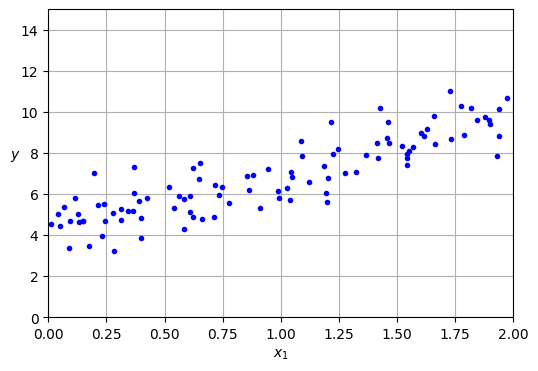

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis((0, 2, 0, 15))
plt.grid()
plt.show()

In [15]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x0 = 1 to each instance, Xbar
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y # normal equation

In [16]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [17]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) # add x0 = 1
y_predict = X_new_b @ theta_best # predictions for X_new
y_predict

array([[4.21509616],
       [9.75532293]])

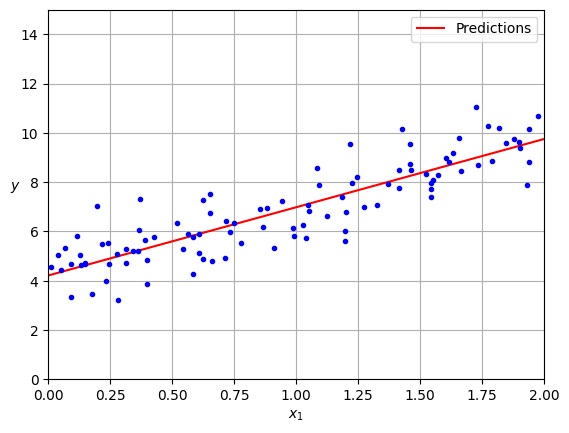

In [19]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis((0, 2, 0, 15))
plt.legend()
plt.grid()
plt.show()

In [20]:
from re import L
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [21]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares")

In [22]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

### Explanation of `np.linalg.lstsq` Parameters and Return Values

**Parameters:**
- `X_b`: The design matrix (independent variables) with shape `(m, n)`.
- `y`: The target vector (dependent variable) with shape `(m, 1)`.
- `rcond`: Cutoff for small singular values. Singular values smaller than `rcond` times the largest singular value are treated as zero. Default is `-1` (machine precision).

**Return Values:**
- `theta_best_svd`: The least-squares solution (coefficients).
- `residuals`: The sum of squared residuals (difference between observed and predicted values). Empty if the solution is exact.
- `rank`: The effective rank of the matrix `X_b`.
- `s`: Singular values of `X_b`.

In [ ]:
np.linalg.pinv(X_b) @ y # giả ma trận

array([[4.21509616],
       [2.77011339]])

# Gradient Descent

## Batch Gradient Descent

In [29]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [30]:
theta

array([[4.21509616],
       [2.77011339]])

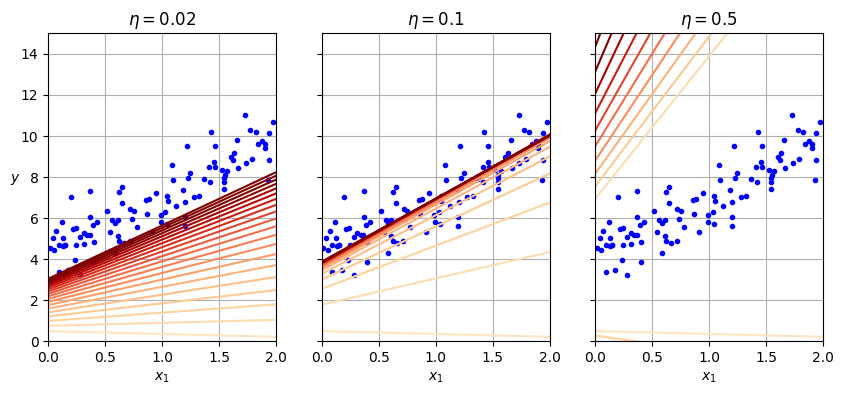

In [ ]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15)) # type: ignore
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        grandients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * grandients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis((0, 2, 0, 15))
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([]) # type: ignore
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([]) # type: ignore
plot_gradient_descent(theta, eta=0.5)
plt.show()



## Stochastic Gradient Descent

The main problem with batch gradient descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, stochastic gradient descent picks
a random instance in the training set at every step and computes the gradients based
only on that single instance

In [52]:
theta_path_sgd = []

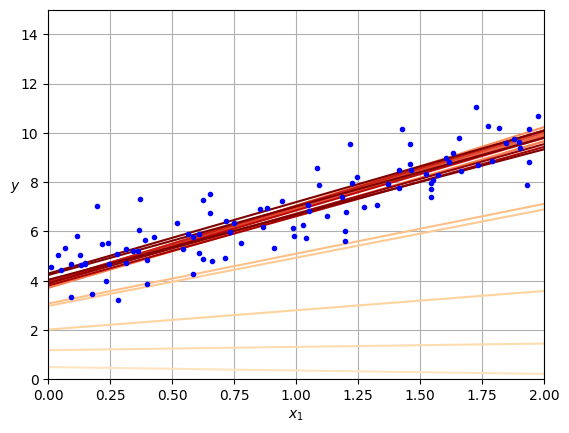

In [ ]:
import random


n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters
n_shown = 20

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    for iteration in range(m):
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15)) # type: ignore
            plt.plot(X_new, y_predict, color=color)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_bgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis((0, 2, 0, 15))
plt.grid()
plt.show()

In [37]:
theta

array([[4.21076011],
       [2.74856079]])

In [39]:
# try with sklearn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100,
                       random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [40]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Mini-batch gradient descent

At each step, instead of computing the gradients based on the full training set (as in batch GD) or based on just one instance (as in stochastic GD), mini-batch GD computes the gradients on small random sets of instances called mini-batches

In [54]:
# extra code – this cell generates and saves Figure 4–11

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis((2.6, 4.6, 2.3, 3.4))
plt.grid()
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 700x400 with 0 Axes>

# Polynomial Regression

Dành cho những trường hợp bộ dữ liệu phức tạp hơn dạng đường thằng

In [55]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

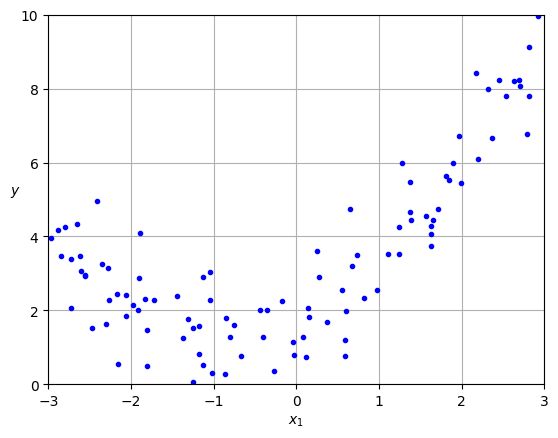

In [56]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis((-3, 3, 0, 10))
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) #
X[0:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [62]:
X_poly[0:5]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433]])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

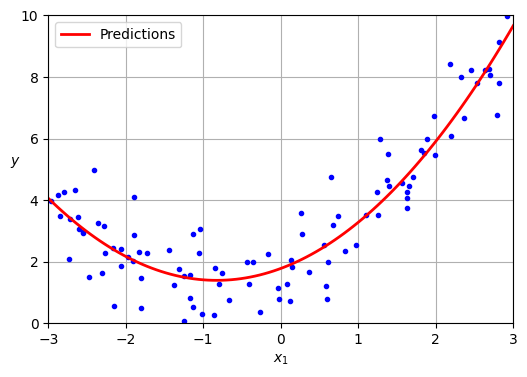

In [64]:
# extra code – this cell generates and saves Figure 4–13

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis((-3, 3, 0, 10))
plt.grid()
plt.show()

# Learning Curves

If you perform high-degree polynomial regression, you will likely fit the training
data much better than with plain linear regression.

NameError: name 'save_fig' is not defined

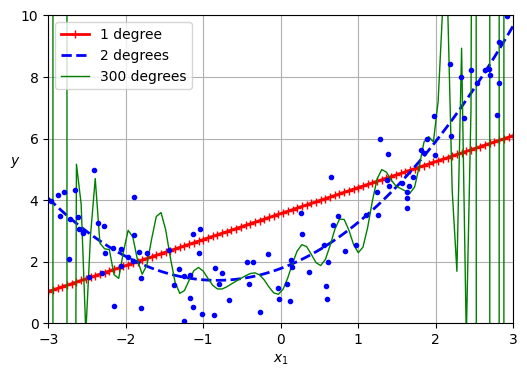

In [65]:
# extra code – this cell generates and saves Figure 4–14

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("high_degree_polynomials_plot")
plt.show()

Mô hình polynomial regression bậc cao này đang bị overfit với training data, tring khi linear model thì underfit.

Chúng ta sử dụng cross-validation để có được ước tính về hiệu suất tổng quát của mô hình. Nếu có hiệu suất tốt trên tập train và hiệu suất thấp theo số liệu cross-validation thì bị overfit, cả 2 đều thấp thì underfit. Đây là một cách để biết khi nào một mô hình quá đơn giản hay quá phức tạp.

Một cách khác đó là nhìn vào `learning curves` là các biểu đồ train error và validation error của mô hình theo hàm của lần lặp đào tạo: chỉ cần đánh giá mô hình theo các khoảng thời gian đều đặn trong quá trình đào tạo trên cả train data và validation data. Nếu mô hình không hỗ trợ huấn luyện gia tăng, ta cần huấn luyện nó nhiều lần trên các tập con lớn dần của tập train.

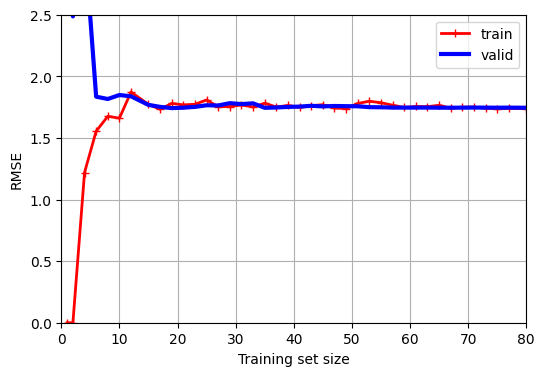

In [69]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
plt.show()